In [41]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast
import matplotlib.dates as mdates
%matplotlib notebook
from scipy.stats import ttest_ind
from pyhomogeneity import snht_test
from dtaidistance import dtw


In [19]:
def combine_csv_with_date(directory_path, date_pattern=r"(\d{4}-\d{2}-\d{2})"):
    csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

    dataframes = []
    for filename in csv_files:
        filepath = os.path.join(directory_path, filename)
        match = re.search(date_pattern, filename)
        if match:
            file_date = match.group(0)
        else:
            print(filename)
            raise Exception()

        df = pd.read_csv(filepath)
        df['Date'] = file_date
        dataframes.append(df)

    if dataframes:
        combined_df = pd.concat(dataframes, ignore_index=True)
        return combined_df
    else:
        # If no CSV files found or if dataframes list is empty
        return pd.DataFrame()  # return an empty DataFrame

In [20]:
df = combine_csv_with_date('../enrichedDataFeatures')
df

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,key_scale,...,sad,non_sad,relaxed,non_relaxed,party,non_party,Date,artist_name,artist_genres,album_name
0,1,spotify:track:2V4A1lYgPT5gjffHHnXwP3,Omer Adam,קאקדילה,P.A.I LTD,1,-1,1,154125,minor,...,0.586395,0.413605,0.209814,0.790186,0.570985,0.429015,2022-01-06,NaN,NaN,NaN
1,2,spotify:track:2liUMhNvpAxRNVAGnz8jNJ,"Static & Ben El, Netta",אפס מאמץ,Mobile1 Music,1,1,27,143093,minor,...,0.910797,0.089203,0.540754,0.459246,0.183550,0.816450,2022-01-06,NaN,NaN,NaN
2,3,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),Columbia,2,3,26,134607,major,...,0.509670,0.490330,0.235030,0.764970,0.502396,0.497604,2022-01-06,NaN,NaN,NaN
3,4,spotify:track:26ffnwQVV4votOweWSwpeN,Narkis,הולכת איתך,session42,2,2,28,133781,minor,...,0.874232,0.125768,0.710895,0.289105,0.195336,0.804664,2022-01-06,NaN,NaN,NaN
4,5,spotify:track:1r9xUipOqoNwggBpENDsvJ,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,KIDinaKORNER/Interscope Records,4,4,10,125399,minor,...,0.645725,0.354275,0.455578,0.544422,0.581859,0.418141,2022-01-06,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7795,46,spotify:track:3DTHsQnfuQVESYAYv0fybQ,Ben Zur,אבא,A List Music LTD under exclusive list to D-Music,36,42,30,114226,major,...,0.952942,0.047057,0.739644,0.260356,0.262814,0.737186,2024-12-26,Ben Zur,['israeli pop'],אבא
7796,47,spotify:track:2HRqTpkrJO5ggZyyK6NPWz,Sabrina Carpenter,Espresso,Island Records,11,48,37,109233,major,...,0.865523,0.134477,0.682283,0.317717,0.239655,0.760345,2024-12-26,Sabrina Carpenter,['pop'],Short n' Sweet
7797,48,spotify:track:68kVzJf0STAv91tuLutuDr,Eden Hason,שקיעות אדומות,Mobile1 Music,2,56,218,106890,major,...,0.971042,0.028958,0.757930,0.242070,0.120232,0.879768,2024-12-26,Eden Hason,['israeli mediterranean'],אלבום 2
7798,49,spotify:track:1saT4tObMScARIwT4wTv0W,Ravid Plotnik,נתראה בגלגול הבא,NaNa Disc,23,50,259,106315,major,...,0.862707,0.137293,0.553048,0.446952,0.313361,0.686639,2024-12-26,Ravid Plotnik,"['israeli hip hop', 'israeli trap']",ועכשיו לחלק האומנותי


In [21]:
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

df

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams,key_scale,...,non_relaxed,party,non_party,Date,artist_name,artist_genres,album_name,Year,Month,Day
0,1,spotify:track:2V4A1lYgPT5gjffHHnXwP3,Omer Adam,קאקדילה,P.A.I LTD,1,-1,1,154125,minor,...,0.790186,0.570985,0.429015,2022-01-06,NaN,NaN,NaN,2022,1,6
1,2,spotify:track:2liUMhNvpAxRNVAGnz8jNJ,"Static & Ben El, Netta",אפס מאמץ,Mobile1 Music,1,1,27,143093,minor,...,0.459246,0.183550,0.816450,2022-01-06,NaN,NaN,NaN,2022,1,6
2,3,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),Columbia,2,3,26,134607,major,...,0.764970,0.502396,0.497604,2022-01-06,NaN,NaN,NaN,2022,1,6
3,4,spotify:track:26ffnwQVV4votOweWSwpeN,Narkis,הולכת איתך,session42,2,2,28,133781,minor,...,0.289105,0.195336,0.804664,2022-01-06,NaN,NaN,NaN,2022,1,6
4,5,spotify:track:1r9xUipOqoNwggBpENDsvJ,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,KIDinaKORNER/Interscope Records,4,4,10,125399,minor,...,0.544422,0.581859,0.418141,2022-01-06,NaN,NaN,NaN,2022,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7795,46,spotify:track:3DTHsQnfuQVESYAYv0fybQ,Ben Zur,אבא,A List Music LTD under exclusive list to D-Music,36,42,30,114226,major,...,0.260356,0.262814,0.737186,2024-12-26,Ben Zur,['israeli pop'],אבא,2024,12,26
7796,47,spotify:track:2HRqTpkrJO5ggZyyK6NPWz,Sabrina Carpenter,Espresso,Island Records,11,48,37,109233,major,...,0.317717,0.239655,0.760345,2024-12-26,Sabrina Carpenter,['pop'],Short n' Sweet,2024,12,26
7797,48,spotify:track:68kVzJf0STAv91tuLutuDr,Eden Hason,שקיעות אדומות,Mobile1 Music,2,56,218,106890,major,...,0.242070,0.120232,0.879768,2024-12-26,Eden Hason,['israeli mediterranean'],אלבום 2,2024,12,26
7798,49,spotify:track:1saT4tObMScARIwT4wTv0W,Ravid Plotnik,נתראה בגלגול הבא,NaNa Disc,23,50,259,106315,major,...,0.446952,0.313361,0.686639,2024-12-26,Ravid Plotnik,"['israeli hip hop', 'israeli trap']",ועכשיו לחלק האומנותי,2024,12,26


## Mood related Timeseries
#### Dancability, Key-Scale, Dynamic Complexity
#### considering the number of streams
## version1


<IPython.core.display.Javascript object>


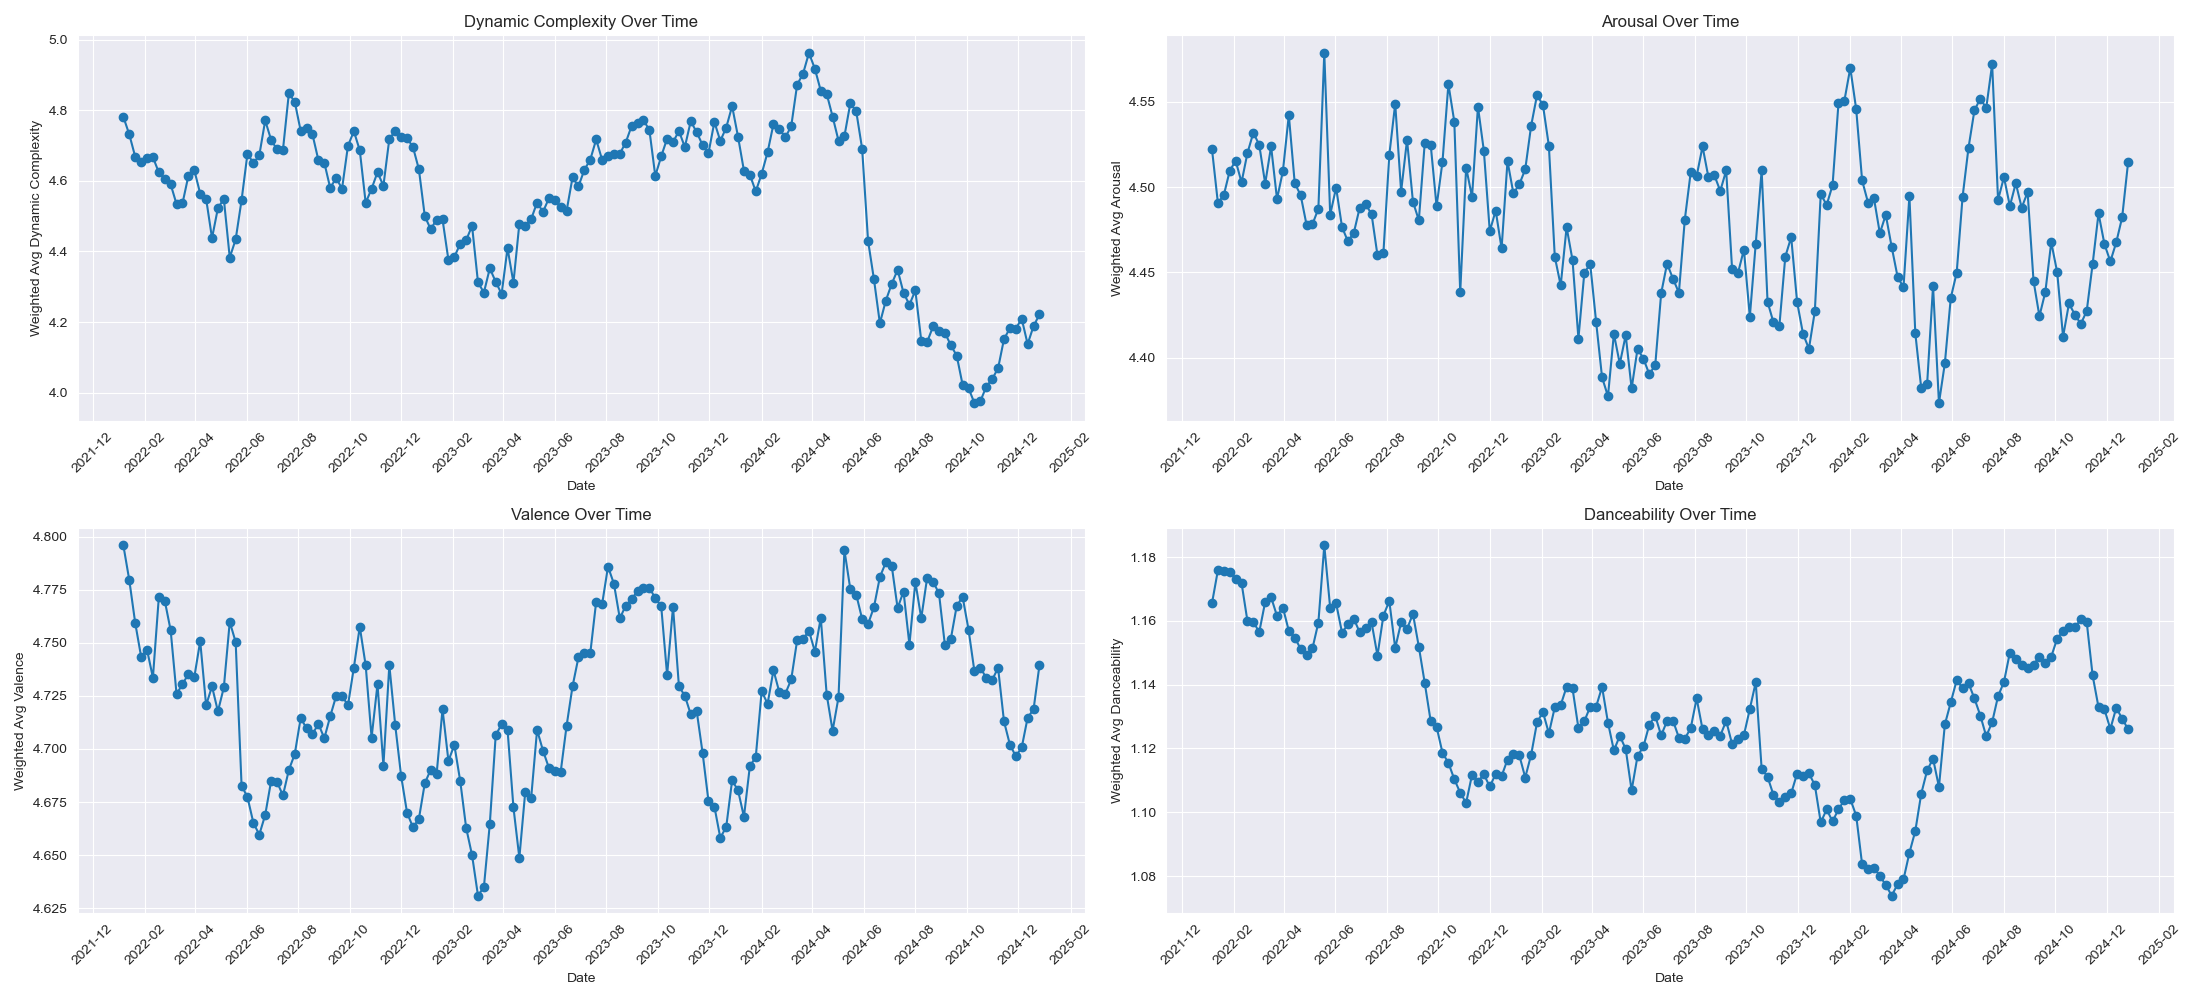

<IPython.core.display.Javascript object>


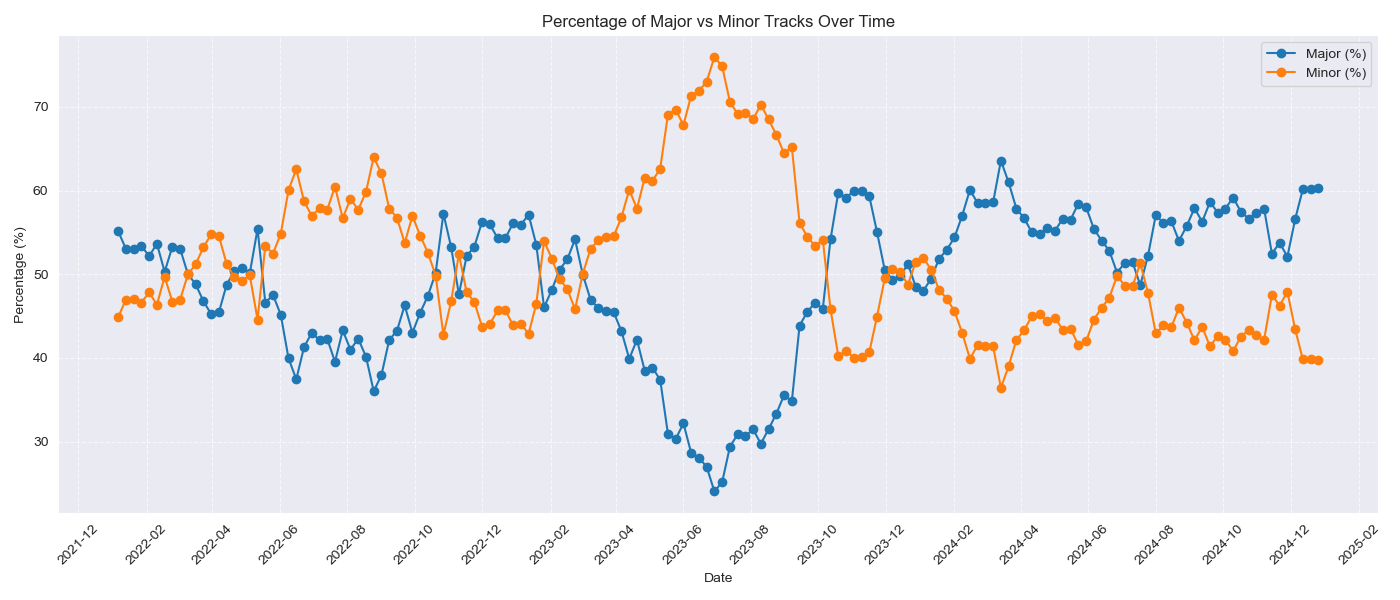

In [32]:
#Load and preprocess the main DataFrame
df['Date'] = pd.to_datetime(df['Date'])

# Multiply each numeric feature by streams to get weighted sums
df['weighted_dynamic_complexity'] = df['dynamic_complexity'] * df['streams']
df['weighted_arousal'] = df['arousal'] * df['streams']
df['weighted_valence'] = df['valence'] * df['streams']
df['weighted_danceability'] = df['danceability'] * df['streams']

#Group by Date to compute weighted averages for numeric features
df_grouped = df.groupby('Date').agg({
    'weighted_dynamic_complexity': 'sum',
    'weighted_arousal': 'sum',
    'weighted_valence': 'sum',
    'weighted_danceability': 'sum',
    'streams': 'sum'
})

df_grouped['dynamic_complexity_avg'] = df_grouped['weighted_dynamic_complexity'] / df_grouped['streams']
df_grouped['arousal_avg'] = df_grouped['weighted_arousal'] / df_grouped['streams']
df_grouped['valence_avg'] = df_grouped['weighted_valence'] / df_grouped['streams']
df_grouped['danceability_avg'] = df_grouped['weighted_danceability'] / df_grouped['streams']

#Create major/minor approach for key scale
#    - Step 1: Create binary flags
df['major_flag'] = df['key_scale'].apply(lambda x: 1 if x == 'major' else 0)
df['minor_flag'] = df['key_scale'].apply(lambda x: 1 if x == 'minor' else 0)

#    - Step 2: Multiply each flag by streams
df['major_streams'] = df['major_flag'] * df['streams']
df['minor_streams'] = df['minor_flag'] * df['streams']

#    - Step 3: Group by Date and sum the streams
df_keyscale_streams = df.groupby('Date', as_index=False)[['major_streams', 'minor_streams']].sum()

#    - Step 4: Create complete weekly Date range (if you want a consistent set of weeks)
full_date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='W-THU')
df_full = pd.DataFrame({'Date': full_date_range})
df_keyscale_streams = pd.merge(df_full, df_keyscale_streams, on='Date', how='left')

#    - Step 5: Fill missing values with zeros
df_keyscale_streams.fillna(0, inplace=True)

#    - Step 6: Calculate total streams and percentages
df_keyscale_streams['Total_Streams'] = df_keyscale_streams['major_streams'] + df_keyscale_streams['minor_streams']
df_keyscale_streams['Major_Percentage'] = (df_keyscale_streams['major_streams'] / df_keyscale_streams['Total_Streams']) * 100
df_keyscale_streams['Minor_Percentage'] = (df_keyscale_streams['minor_streams'] / df_keyscale_streams['Total_Streams']) * 100

#Plot numeric features (4 subplots)
fig, axs = plt.subplots(2, 2, figsize=(22, 10))
axs = axs.flatten()

months = mdates.MonthLocator(interval=2)
months_fmt = mdates.DateFormatter('%Y-%m')

plots = [
    (df_grouped.index, df_grouped['dynamic_complexity_avg'], 'Dynamic Complexity', 'Weighted Avg Dynamic Complexity'),
    (df_grouped.index, df_grouped['arousal_avg'], 'Arousal', 'Weighted Avg Arousal'),
    (df_grouped.index, df_grouped['valence_avg'], 'Valence', 'Weighted Avg Valence'),
    (df_grouped.index, df_grouped['danceability_avg'], 'Danceability', 'Weighted Avg Danceability')
]

for i, (x, y, title, ylabel) in enumerate(plots):
    ax = axs[i]
    ax.plot(x, y, marker='o')
    ax.set_title(f"{title} Over Time")
    ax.set_xlabel('Date')
    ax.set_ylabel(ylabel)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(months_fmt)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)

plt.tight_layout()
plt.show()

#Plot key scale approach (Major vs Minor)
plt.figure(figsize=(14, 6))
plt.plot(df_keyscale_streams['Date'], df_keyscale_streams['Major_Percentage'], label='Major (%)', marker='o')
plt.plot(df_keyscale_streams['Date'], df_keyscale_streams['Minor_Percentage'], label='Minor (%)', marker='o')

plt.title('Percentage of Major vs Minor Tracks Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage (%)')
plt.legend()

plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(months_fmt)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [6]:
columns_to_drop = [
    "weighted_dynamic_complexity",
    "weighted_arousal",
    "weighted_valence",
    "weighted_danceability",
    "streams"
]

df_grouped.drop(columns=columns_to_drop, inplace=True)
df_grouped


,dynamic_complexity_avg,arousal_avg,valence_avg,danceability_avg
Date,,,,
2022-01-06,4.781093,4.522185,4.795863,1.165539
2022-01-13,4.731445,4.490700,4.779571,1.175862
2022-01-20,4.668540,4.495324,4.759429,1.175652
2022-01-27,4.652706,4.509490,4.743534,1.175473
2022-02-03,4.664490,4.515437,4.746787,1.173252
...,...,...,...,...
2024-11-28,4.181576,4.466641,4.696579,1.132286
2024-12-05,4.209076,4.456409,4.700692,1.126089
2024-12-12,4.137536,4.467636,4.714731,1.132768


In [7]:
df_keyscale_streams

,Date,major_streams,minor_streams,Total_Streams,Major_Percentage,Minor_Percentage
0,2022-01-06,2342774,1905583,4248357,55.145413,44.854587
1,2022-01-13,2250565,1994216,4244781,53.019579,46.980421
2,2022-01-20,2096631,1859731,3956362,52.993912,47.006088
3,2022-01-27,2175026,1899860,4074886,53.376364,46.623636
4,2022-02-03,2122452,1946038,4068490,52.168053,47.831947
...,...,...,...,...,...,...
151,2024-11-28,5245082,4824474,10069556,52.088513,47.911487
152,2024-12-05,5653604,4341152,9994756,56.565703,43.434297
153,2024-12-12,5993270,3966384,9959654,60.175484,39.824516
154,2024-12-19,5706356,3776382,9482738,60.176249,39.823751


## Our dataframe with weighted average
## version1


In [8]:
#Merge using the index from df_grouped and the 'Date' column from df_keyscale_streams
df_combined = df_grouped.merge(df_keyscale_streams[['Date', 'major_streams', 'minor_streams']],left_index=True, right_on='Date', how='left')

# Optionally, if you want to set the index back to 'Date' and drop the duplicate column:
df_combined.set_index('Date', inplace=True)

df_combined.reset_index(inplace=True)


df_combined

,Date,dynamic_complexity_avg,arousal_avg,valence_avg,danceability_avg,major_streams,minor_streams
0,2022-01-06,4.781093,4.522185,4.795863,1.165539,2342774,1905583
1,2022-01-13,4.731445,4.490700,4.779571,1.175862,2250565,1994216
2,2022-01-20,4.668540,4.495324,4.759429,1.175652,2096631,1859731
3,2022-01-27,4.652706,4.509490,4.743534,1.175473,2175026,1899860
4,2022-02-03,4.664490,4.515437,4.746787,1.173252,2122452,1946038
...,...,...,...,...,...,...,...
151,2024-11-28,4.181576,4.466641,4.696579,1.132286,5245082,4824474
152,2024-12-05,4.209076,4.456409,4.700692,1.126089,5653604,4341152
153,2024-12-12,4.137536,4.467636,4.714731,1.132768,5993270,3966384
154,2024-12-19,4.188407,4.482331,4.718622,1.129345,5706356,3776382


## Key scale
#### minor major DF
####  CONSIDERING the number of streams

In [9]:
# Step 1: Create binary flags
df['major_flag'] = df['key_scale'].apply(lambda x: 1 if x == 'major' else 0)
df['minor_flag'] = df['key_scale'].apply(lambda x: 1 if x == 'minor' else 0)

# Step 2: Multiply each flag by the number of streams
df['major_streams'] = df['major_flag'] * df['streams']
df['minor_streams'] = df['minor_flag'] * df['streams']

# Step 3: Group by Date and sum the streams
df_keyscale_streams = df.groupby('Date', as_index=False)[['major_streams', 'minor_streams']].sum()

# Step 4: Create complete weekly Date range
full_date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='W-THU')

# Step 5: Merge to ensure all weeks are present
df_full = pd.DataFrame({'Date': full_date_range})
df_keyscale_streams = pd.merge(df_full, df_keyscale_streams, on='Date', how='left')

# Step 6: Fill missing values with zeros
df_keyscale_streams.fillna(0, inplace=True)

# Step 7: Rename columns for clarity
df_keyscale_streams.columns = ['Date', 'Sum_Major_Streams', 'Sum_Minor_Streams']

# Optional: Add total streams and percentages
df_keyscale_streams['Total_Streams'] = df_keyscale_streams['Sum_Major_Streams'] + df_keyscale_streams['Sum_Minor_Streams']
df_keyscale_streams['Major_Percentage'] = (df_keyscale_streams['Sum_Major_Streams'] / df_keyscale_streams['Total_Streams']) * 100
df_keyscale_streams['Minor_Percentage'] = (df_keyscale_streams['Sum_Minor_Streams'] / df_keyscale_streams['Total_Streams']) * 100

# Step 8: Display result
df_keyscale_streams


,Date,Sum_Major_Streams,Sum_Minor_Streams,Total_Streams,Major_Percentage,Minor_Percentage
0,2022-01-06,2342774,1905583,4248357,55.145413,44.854587
1,2022-01-13,2250565,1994216,4244781,53.019579,46.980421
2,2022-01-20,2096631,1859731,3956362,52.993912,47.006088
3,2022-01-27,2175026,1899860,4074886,53.376364,46.623636
4,2022-02-03,2122452,1946038,4068490,52.168053,47.831947
...,...,...,...,...,...,...
151,2024-11-28,5245082,4824474,10069556,52.088513,47.911487
152,2024-12-05,5653604,4341152,9994756,56.565703,43.434297
153,2024-12-12,5993270,3966384,9959654,60.175484,39.824516
154,2024-12-19,5706356,3776382,9482738,60.176249,39.823751


## Trend Analysis Over Time
#### Plot how the percentage of Major and Minor tracks changes over the 156 weeks.

In [10]:

# Assuming df_keyscale_streams is already created from the previous step

# Plotting
plt.figure(figsize=(18, 8))

# Plot Major Percentage
plt.plot(df_keyscale_streams['Date'], df_keyscale_streams['Major_Percentage'], label='Major Tracks (%)', color='blue', linewidth=2)

# Plot Minor Percentage
plt.plot(df_keyscale_streams['Date'], df_keyscale_streams['Minor_Percentage'], label='Minor Tracks (%)', color='orange', linewidth=2)

# Title and Labels
plt.title('Percentage of Major and Minor Tracks (Weighted by Streams) Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Percentage (%)')

# Format X-axis with months
months = mdates.MonthLocator(interval=2)  # Every 2 months
months_fmt = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_locator(months)
plt.gca().xaxis.set_major_formatter(months_fmt)
plt.xticks(rotation=45)

# Grid, legend and layout
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()

# Show plot
plt.show()

<IPython.core.display.Javascript object>

## Before vs After Specific Events Comparison
#### Check if the emotional tone (minor = sadder, major = happier) significantly shifts during crises.


In [11]:
# Calculate averages before and after war
war_start_date = pd.to_datetime('2023-10-07')
before_war = df_keyscale_streams[df_keyscale_streams['Date'] < war_start_date]
after_war = df_keyscale_streams[df_keyscale_streams['Date'] >= war_start_date]

# Calculate and print
print("===== Before War =====")
print(f"Average Major Percentage: {before_war['Major_Percentage'].mean():.2f}%")
print(f"Average Minor Percentage: {before_war['Minor_Percentage'].mean():.2f}%\n")

print("===== After War =====")
print(f"Average Major Percentage: {after_war['Major_Percentage'].mean():.2f}%")
print(f"Average Minor Percentage: {after_war['Minor_Percentage'].mean():.2f}%")


===== Before War =====
Average Major Percentage: 44.34%
Average Minor Percentage: 55.66%

===== After War =====
Average Major Percentage: 55.67%
Average Minor Percentage: 44.33%


## Statistical Testing: T test

In [12]:

# T-test for Minor_Percentage before and after war
t_stat, p_val = ttest_ind(before_war['Minor_Percentage'], after_war['Minor_Percentage'], equal_var=False)
print(f"T-test results for Minor Percentage:")
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4e}")

# Optional: T-test for Major_Percentage as well
t_stat_major, p_val_major = ttest_ind(before_war['Major_Percentage'], after_war['Major_Percentage'], equal_var=False)
print(f"\nT-test results for Major Percentage:")
print(f"T-statistic: {t_stat_major:.4f}, p-value: {p_val_major:.4e}")


T-test results for Minor Percentage:
T-statistic: 11.3476, p-value: 3.3707e-21

T-test results for Major Percentage:
T-statistic: -11.3476, p-value: 3.3707e-21


## DataFrame of the total streams info combined with the featue values:
### df[f'{feature}_weighted'] = df['streams'] * df[feature]
## NOT a weighted avrage, just feature*streams for each track
# Version2

In [42]:
# Assuming df is already loaded and 'Date' column is datetime
df['Date'] = pd.to_datetime(df['Date'])

#Create flags for Major and Minor keys
df['major_flag'] = df.apply(lambda row: row['streams'] if row['key_scale'] == 'major' else 0, axis=1)
df['minor_flag'] = df.apply(lambda row: row['streams'] if row['key_scale'] == 'minor' else 0, axis=1)

#Compute weighted columns for each feature
features = ['arousal', 'valence', 'danceability', 'dynamic_complexity']
for feature in features:
    df[f'{feature}_weighted'] = df['streams'] * df[feature]

#Group by Date and sum the weighted values
grouped = df.groupby('Date').agg({
    'arousal_weighted': 'sum',
    'valence_weighted': 'sum',
    'danceability_weighted': 'sum',
    'dynamic_complexity_weighted': 'sum',
    'major_flag': 'sum',
    'minor_flag': 'sum'
}).reset_index()

#Rename columns for clarity
grouped.rename(columns={
    'major_flag': 'major_weighted',
    'minor_flag': 'minor_weighted'
}, inplace=True)


dfConsideringStreams = grouped
dfConsideringStreams

,Date,arousal_weighted,valence_weighted,danceability_weighted,dynamic_complexity_weighted,major_weighted,minor_weighted
0,2022-01-06,1.921186e+07,2.037454e+07,4.951627e+06,2.031179e+07,2342774,1905583
1,2022-01-13,1.906204e+07,2.028823e+07,4.991275e+06,2.008395e+07,2250565,1994216
2,2022-01-20,1.778513e+07,1.883002e+07,4.651303e+06,1.847043e+07,2096631,1859731
3,2022-01-27,1.837566e+07,1.932936e+07,4.789918e+06,1.895925e+07,2175026,1899860
4,2022-02-03,1.837101e+07,1.931225e+07,4.773364e+06,1.897743e+07,2122452,1946038
...,...,...,...,...,...,...,...
151,2024-11-28,4.497709e+07,4.729247e+07,1.140162e+07,4.210661e+07,5245082,4824474
152,2024-12-05,4.454072e+07,4.698227e+07,1.125498e+07,4.206868e+07,5653604,4341152
153,2024-12-12,4.449611e+07,4.695709e+07,1.128198e+07,4.120842e+07,5993270,3966384
154,2024-12-19,4.250477e+07,4.474546e+07,1.070928e+07,3.971756e+07,5706356,3776382


In [43]:
plots = [
    (dfConsideringStreams.index, dfConsideringStreams['dynamic_complexity_weighted'], 'Dynamic Complexity', 'Weighted Dynamic Complexity'),
    (dfConsideringStreams.index, dfConsideringStreams['arousal_weighted'], 'Arousal', 'Weighted Arousal'),
    (dfConsideringStreams.index, dfConsideringStreams['valence_weighted'], 'Valence', 'Weighted Valence'),
    (dfConsideringStreams.index, dfConsideringStreams['danceability_weighted'], 'Danceability', 'Weighted Danceability'),
    (dfConsideringStreams.index, dfConsideringStreams['major_weighted'], 'Major', 'Weighted Major'),
    (dfConsideringStreams.index, dfConsideringStreams['minor_weighted'], 'Minor', 'Weighted Minor')
]

for i, (x, y, title, ylabel) in enumerate(plots):

    plt.figure(figsize=(20, 5))  # Optional: set figure size
    plt.plot(dfConsideringStreams['Date'], y, marker='o', linestyle='-')
    # 4. Labeling the chart
    plt.title(f'{ylabel}')
    plt.xlabel('Date')
    plt.ylabel(f'{title}')
    # 5. Format the dates on the x-axis (optional; helps if you have many dates)
    plt.xticks(rotation=45)
    # 6. Show the plot
    plt.tight_layout()  # Adjusts plot to ensure everything fits without overlap
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Homogeneity Test


## SNHT for version2

In [14]:
# Compute SNHT for each weighted feature
arousalPoint = snht_test(dfConsideringStreams['arousal_weighted'].tolist())
valencePoint = snht_test(dfConsideringStreams['valence_weighted'].tolist())
danceabilityPoint = snht_test(dfConsideringStreams['danceability_weighted'].tolist())
dynamic_complexityPoint = snht_test(dfConsideringStreams['dynamic_complexity_weighted'].tolist())
majorPoint = snht_test(dfConsideringStreams['major_weighted'].tolist())
minorPoint = snht_test(dfConsideringStreams['minor_weighted'].tolist())

# Build a dictionary mapping feature names to their SNHT result objects
features_points = {
    'arousal_weighted': arousalPoint,
    'valence_weighted': valencePoint,
    'danceability_weighted': danceabilityPoint,
    'dynamic_complexity_weighted': dynamic_complexityPoint,
    'major_weighted': majorPoint,
    'minor_weighted': minorPoint
}

# Create a list to store breakpoint info for each feature
breakpoints_list = []

for feature, point_obj in features_points.items():
    cp_index = point_obj.cp  # Change point index from SNHT test
    bp_date = dfConsideringStreams.loc[cp_index, 'Date']
    mean_before = dfConsideringStreams[feature].iloc[:cp_index].mean()
    mean_after = dfConsideringStreams[feature].iloc[cp_index:].mean()

    breakpoints_list.append({
        'Feature': feature,
        'Breakpoint Date': bp_date,
        'Mean Before': mean_before,
        'Mean After': mean_after
    })

# Create the DataFrame of breakpoints
features_breakpoints = pd.DataFrame(breakpoints_list)

# Display the resulting DataFrame
features_breakpoints

,Feature,Breakpoint Date,Mean Before,Mean After
0,arousal_weighted,2024-03-07,2.429896e+07,3.998972e+07
1,valence_weighted,2024-03-07,2.556968e+07,4.255024e+07
2,danceability_weighted,2024-03-14,6.137246e+06,1.016680e+07
3,dynamic_complexity_weighted,2023-12-07,2.404332e+07,3.761789e+07
4,major_weighted,2024-02-08,2.430621e+06,4.941999e+06
5,minor_weighted,2023-03-09,2.432850e+06,3.710306e+06


<IPython.core.display.Javascript object>


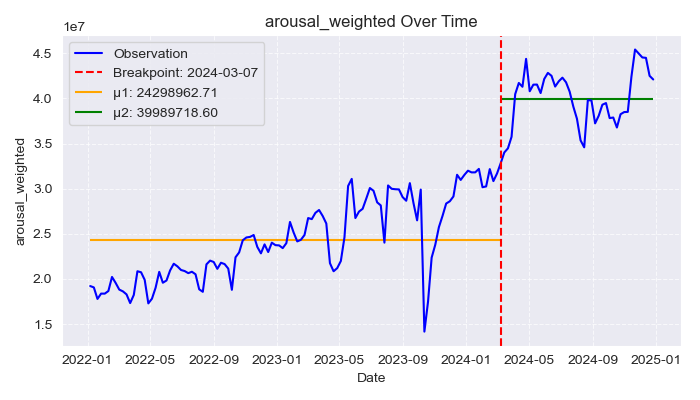

<IPython.core.display.Javascript object>


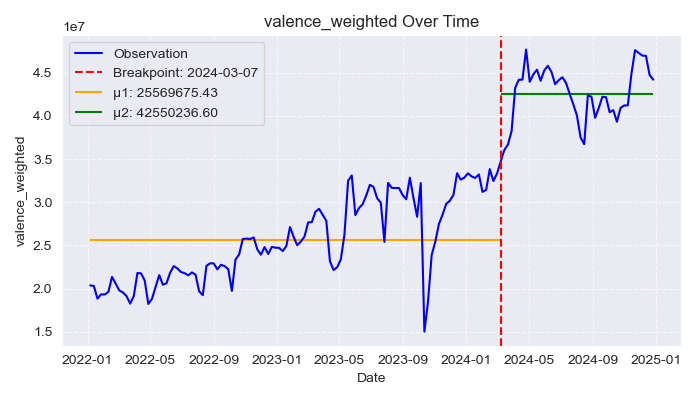

<IPython.core.display.Javascript object>


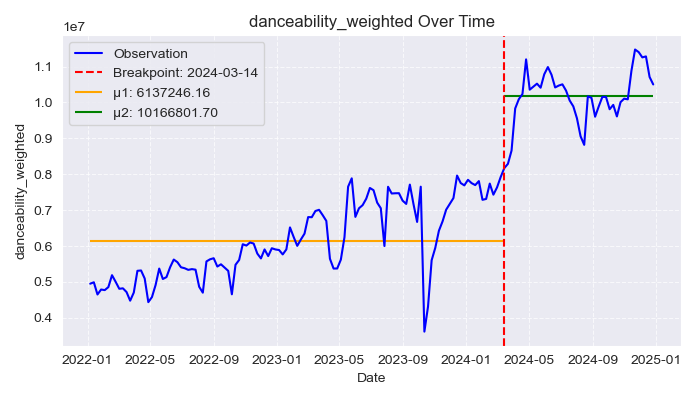

<IPython.core.display.Javascript object>


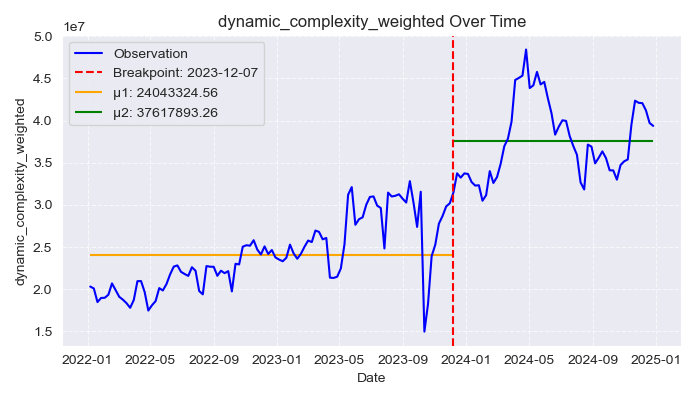

<IPython.core.display.Javascript object>


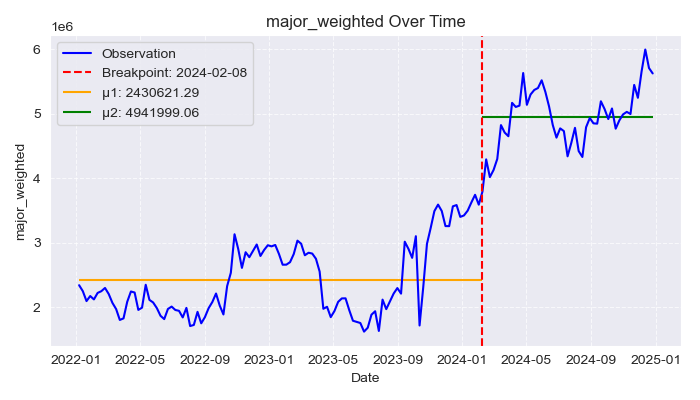

<IPython.core.display.Javascript object>


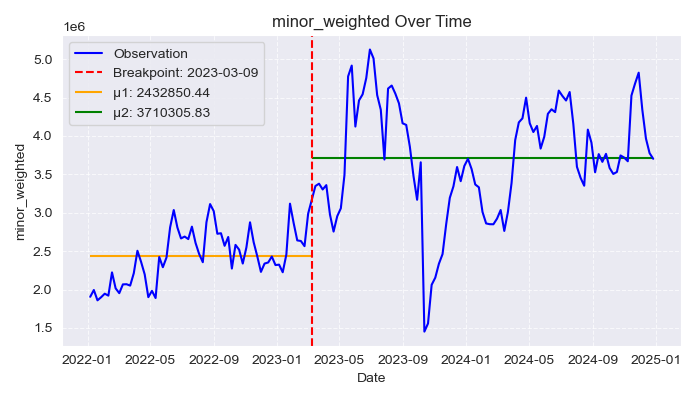

In [25]:
# Loop over each row in features_breakpoints
for i in range(len(features_breakpoints)):
    feature = features_breakpoints.loc[i, 'Feature']
    break_date = features_breakpoints.loc[i, 'Breakpoint Date']
    mean_bef = features_breakpoints.loc[i, 'Mean Before']
    mean_aft = features_breakpoints.loc[i, 'Mean After']

    # Extract time series for this feature
    x = dfConsideringStreams['Date']
    y = dfConsideringStreams[feature]

    # Create a new figure for each feature
    plt.figure(figsize=(7, 4))
    plt.plot(x, y, label='Observation', color='blue')

    # Vertical line at breakpoint
    plt.axvline(break_date, color='red', linestyle='--',
                label=f"Breakpoint: {break_date.strftime('%Y-%m-%d')}")

    # Horizontal lines for means
    start_date = x.min()
    end_date = x.max()
    plt.hlines(mean_bef, start_date, break_date, color='orange',
               label=f"μ1: {mean_bef:.2f}")
    plt.hlines(mean_aft, break_date, end_date, color='green',
               label=f"μ2: {mean_aft:.2f}")

    # Formatting
    plt.title(f"{feature} Over Time")
    plt.xlabel("Date")
    plt.ylabel(feature)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()

    # Show plot (each loop iteration produces a separate figure)
    plt.show()


## SNHT according to df_combined
## SNHT for version1

In [16]:
# Compute SNHT for each weighted feature
arousalPoint = snht_test(df_combined['arousal_avg'].tolist())
valencePoint = snht_test(df_combined['valence_avg'].tolist())
danceabilityPoint = snht_test(df_combined['danceability_avg'].tolist())
dynamic_complexityPoint = snht_test(df_combined['dynamic_complexity_avg'].tolist())
majorPoint = snht_test(df_combined['major_streams'].tolist())
minorPoint = snht_test(df_combined['minor_streams'].tolist())

# Build a dictionary mapping feature names to their SNHT result objects
features_points = {
    'arousal_avg': arousalPoint,
    'valence_avg': valencePoint,
    'danceability_avg': danceabilityPoint,
    'dynamic_complexity_avg': dynamic_complexityPoint,
    'major_streams': majorPoint,
    'minor_streams': minorPoint
}

# Create a list to store breakpoint info for each feature
breakpoints_list = []

for feature, point_obj in features_points.items():
    cp_index = point_obj.cp  # Change point index from SNHT test
    bp_date = df_combined.loc[cp_index, 'Date']
    mean_before = df_combined[feature].iloc[:cp_index].mean()
    mean_after = df_combined[feature].iloc[cp_index:].mean()

    breakpoints_list.append({
        'Feature': feature,
        'Breakpoint Date': bp_date,
        'Mean Before': mean_before,
        'Mean After': mean_after
    })

# Create the DataFrame of breakpoints
features_breakpoints_version1 = pd.DataFrame(breakpoints_list)

# Display the resulting DataFrame
features_breakpoints_version1


,Feature,Breakpoint Date,Mean Before,Mean After
0,arousal_avg,2023-02-16,4.505652e+00,4.460706e+00
1,valence_avg,2023-06-22,4.707408e+00,4.741377e+00
2,danceability_avg,2022-09-15,1.161612e+00,1.121831e+00
3,dynamic_complexity_avg,2024-06-13,4.634379e+00,4.161833e+00
4,major_streams,2024-02-08,2.430621e+06,4.941999e+06
5,minor_streams,2023-03-09,2.432850e+06,3.710306e+06


<IPython.core.display.Javascript object>


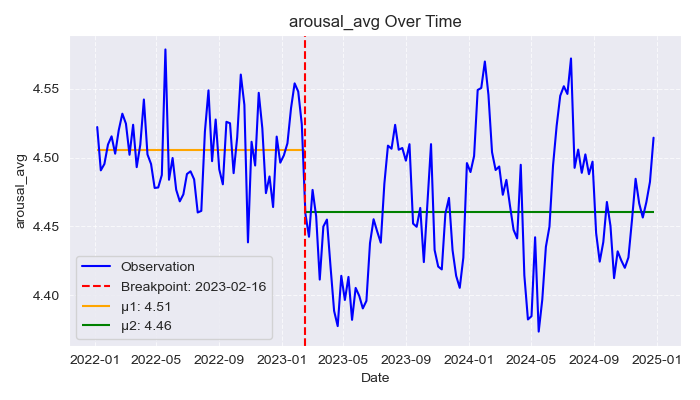

<IPython.core.display.Javascript object>


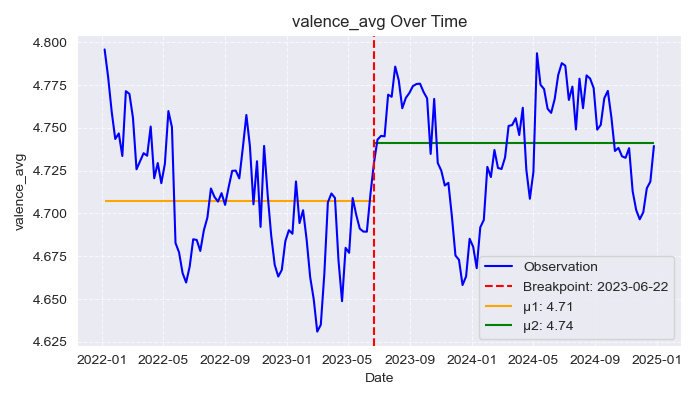

<IPython.core.display.Javascript object>


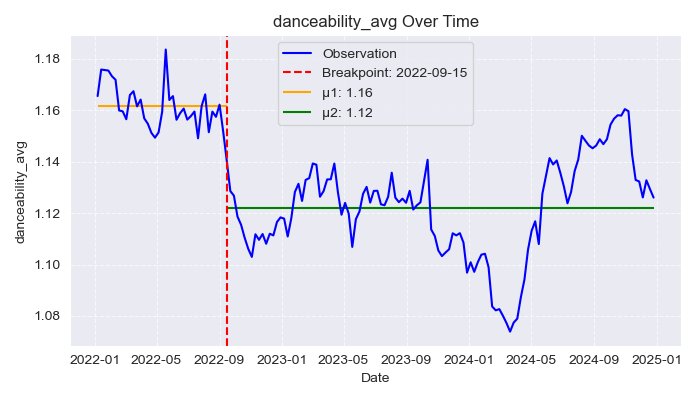

<IPython.core.display.Javascript object>


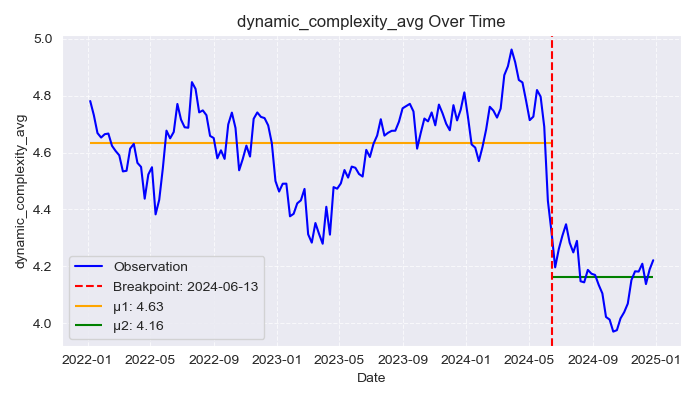

<IPython.core.display.Javascript object>


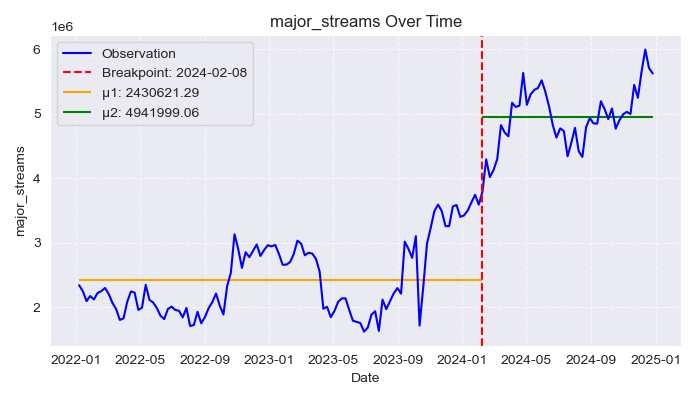

<IPython.core.display.Javascript object>


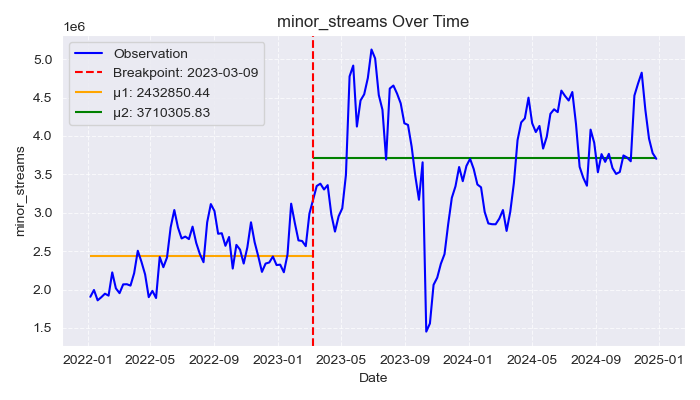

In [27]:
# Loop over each row in features_breakpoints
for i in range(len(features_breakpoints_version1)):
    feature = features_breakpoints_version1.loc[i, 'Feature']
    break_date = features_breakpoints_version1.loc[i, 'Breakpoint Date']
    mean_bef = features_breakpoints_version1.loc[i, 'Mean Before']
    mean_aft = features_breakpoints_version1.loc[i, 'Mean After']

    # Extract time series for this feature
    x = df_combined['Date']
    y = df_combined[feature]

    # Create a new figure for each feature
    plt.figure(figsize=(7, 4))
    plt.plot(x, y, label='Observation', color='blue')

    # Vertical line at breakpoint
    plt.axvline(break_date, color='red', linestyle='--',
                label=f"Breakpoint: {break_date.strftime('%Y-%m-%d')}")

    # Horizontal lines for means
    start_date = x.min()
    end_date = x.max()
    plt.hlines(mean_bef, start_date, break_date, color='orange',
               label=f"μ1: {mean_bef:.2f}")
    plt.hlines(mean_aft, break_date, end_date, color='green',
               label=f"μ2: {mean_aft:.2f}")

    # Formatting
    plt.title(f"{feature} Over Time")
    plt.xlabel("Date")
    plt.ylabel(feature)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()

    # Show plot (each loop iteration produces a separate figure)
    plt.show()
